In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas numpy ijson gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 8.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import ijson
import json
import gdown

In [4]:
# Download AWS pricing data
file_id = "1AaO3guRQvvWl-OQr1HgoCowL84pLaVDH"  # Replace with your file ID
output_path = "/content/aws_pricing.json"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1AaO3guRQvvWl-OQr1HgoCowL84pLaVDH
From (redirected): https://drive.google.com/uc?id=1AaO3guRQvvWl-OQr1HgoCowL84pLaVDH&confirm=t&uuid=d1d456d9-417a-4a23-a7d1-39defe512af6
To: /content/aws_pricing.json
100%|██████████| 6.59G/6.59G [01:17<00:00, 85.0MB/s]


'/content/aws_pricing.json'

In [5]:
# Define target region
target_region = "Asia Pacific (Malaysia)"

# Extract relevant fields
fields = ["sku", "instanceType", "vcpu", "memory", "storage", "operatingSystem", "marketoption", "regionCode"]

# Filter pricing data
filtered_data = []

with open("/content/aws_pricing.json", "r", encoding="utf-8") as f:
    products = ijson.kvitems(f, "products")  # Stream through "products"

    for product_id, product in products:
        attributes = product.get("attributes", {})
        if attributes.get("location") == target_region:
            row = {field: attributes.get(field, "N/A") for field in fields}
            filtered_data.append(row)

# Save filtered data to CSV
filtered_df = pd.DataFrame(filtered_data)
filtered_df.to_csv("/content/drive/MyDrive/aws_pricing_filtered.csv", index=False)

print(f" Extracted {len(filtered_data)} instances in {target_region}")
print(filtered_df.head())

 Extracted 20631 instances in Asia Pacific (Malaysia)
   sku instanceType vcpu   memory              storage  \
0  N/A  c7gd.medium    1    2 GiB      1 x 59 NVMe SSD   
1  N/A    m7i.large    2    8 GiB             EBS only   
2  N/A  m7gd.xlarge    4   16 GiB     1 x 237 NVMe SSD   
3  N/A  c7i.4xlarge   16   32 GiB             EBS only   
4  N/A  g6.16xlarge   64  256 GiB  2 x 940 GB NVMe SSD   

                    operatingSystem marketoption      regionCode  
0                              RHEL     OnDemand  ap-southeast-5  
1  Red Hat Enterprise Linux with HA     OnDemand  ap-southeast-5  
2                             Linux     OnDemand  ap-southeast-5  
3                              SUSE     OnDemand  ap-southeast-5  
4  Red Hat Enterprise Linux with HA     OnDemand  ap-southeast-5  


In [6]:
filtered_df = pd.read_csv("/content/drive/MyDrive/aws_pricing_filtered.csv")

In [7]:
def fetch_instance_details(instance_type, region, pricing_df):
    """
    Fetch details for a specific instance type and region from the pricing data.
    """
    instance_details = pricing_df[
        (pricing_df["instanceType"] == instance_type) &
        (pricing_df["regionCode"] == region)
    ]
    if not instance_details.empty:
        return instance_details.iloc[0].to_dict()
    else:
        raise ValueError(f"Instance type '{instance_type}' not found in region '{region}'.")

In [8]:
# Define instance type and region
instance_type = "c7gd.medium"
region = "ap-southeast-5"  # Region code for Asia Pacific (Malaysia)

# Fetch instance details
instance_details = fetch_instance_details(instance_type, region, filtered_df)

# Add pricing information (if not already in the data)
instance_details["on_demand_hourly_price_usd"] = 0.10  # Example price
instance_details["reserved_1_year_hourly_price_usd"] = 0.07
instance_details["reserved_3_year_hourly_price_usd"] = 0.05

print("Instance Details Fetched:")
print(json.dumps(instance_details, indent=4))

Instance Details Fetched:
{
    "sku": NaN,
    "instanceType": "c7gd.medium",
    "vcpu": 1.0,
    "memory": "2 GiB",
    "storage": "1 x 59 NVMe SSD",
    "operatingSystem": "RHEL",
    "marketoption": "OnDemand",
    "regionCode": "ap-southeast-5",
    "on_demand_hourly_price_usd": 0.1,
    "reserved_1_year_hourly_price_usd": 0.07,
    "reserved_3_year_hourly_price_usd": 0.05
}


In [9]:
import ijson

# Extract unique locations from the JSON file
unique_locations = set()

with open("/content/aws_pricing.json", "r", encoding="utf-8") as f:
    products = ijson.kvitems(f, "products")  # Stream through the 'products'

    for product_id, product in products:
        location = product.get("attributes", {}).get("location")
        if location:  # Only add non-empty locations
            unique_locations.add(location)

print("Available Locations:")
for location in sorted(unique_locations):
    print(location)


Available Locations:
AWS GovCloud (US-East)
AWS GovCloud (US-West)
Africa (Cape Town)
Argentina (Buenos Aires)
Asia Pacific (Hong Kong)
Asia Pacific (Hyderabad)
Asia Pacific (Jakarta)
Asia Pacific (KDDI) - Osaka
Asia Pacific (KDDI) - Tokyo
Asia Pacific (Malaysia)
Asia Pacific (Melbourne)
Asia Pacific (Mumbai)
Asia Pacific (Osaka)
Asia Pacific (SKT) - Daejeon
Asia Pacific (SKT) - Seoul
Asia Pacific (Seoul)
Asia Pacific (Singapore)
Asia Pacific (Sydney)
Asia Pacific (Thailand)
Asia Pacific (Tokyo)
Australia (Perth)
Canada (BELL) - Toronto
Canada (Central)
Canada West (Calgary)
Chile (Santiago)
Denmark (Copenhagen)
EU (Frankfurt)
EU (Ireland)
EU (London)
EU (Milan)
EU (Paris)
EU (Stockholm)
Europe (British Telecom) - Manchester
Europe (Spain)
Europe (Vodafone) - Berlin
Europe (Vodafone) - Dortmund
Europe (Vodafone) - London
Europe (Vodafone) - Manchester
Europe (Vodafone) - Munich
Europe (Zurich)
Finland (Helsinki)
Germany (Hamburg)
India (Delhi)
India (Kolkata)
Israel (Tel Aviv)
Mexico (

In [10]:
import pandas as pd  # Make sure pandas is imported

# Load the log report
log_df = pd.read_csv("/content/Log Report_2025.csv", skiprows=5, names=[
    "timestamp", "status", "cpu_utilization", "bytes_received", "bytes_sent",
    "packets_received", "packets_sent", "disk_read_ops", "disk_write_ops"
])

# Clean and process the data
log_df["timestamp"] = pd.to_datetime(log_df["timestamp"], errors="coerce")
log_df["cpu_utilization"] = pd.to_numeric(log_df["cpu_utilization"], errors="coerce")

# Aggregate CPU utilization by date
cpu_stats = log_df.groupby(log_df["timestamp"].dt.date)["cpu_utilization"].agg(["mean", "max", "min"])

print("CPU Utilization Summary:")
print(cpu_stats.head())


CPU Utilization Summary:
                mean   max   min
timestamp                       
2025-03-10  0.375000  0.46  0.35
2025-03-11  0.373333  0.48  0.34
2025-03-12  0.384783  0.80  0.32
2025-03-13  0.386667  0.72  0.32
2025-03-14  0.370417  0.47  0.35


<ipython-input-10-eaf5ed77f521>:10: FutureWarning: Parsed string "17 March 2025 9:10:58 AM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  log_df["timestamp"] = pd.to_datetime(log_df["timestamp"], errors="coerce")


In [11]:
# Get average CPU utilization
avg_cpu_utilization = cpu_stats["mean"].mean()

# Compare with instance capacity
if avg_cpu_utilization < 20:  # Underutilized
    print("Instance is underutilized. Consider downgrading.")
elif avg_cpu_utilization > 80:  # Overutilized
    print("Instance is overutilized. Consider upgrading.")
else:
    print("Instance utilization is optimal.")

Instance is underutilized. Consider downgrading.


In [12]:
import pandas as pd

# Load the filtered pricing data (Ensure this file exists in the correct path)
pricing_file_path = "/content/aws_pricing_filtered.csv"  # Update if needed

try:
    filtered_df = pd.read_csv(pricing_file_path)
    print("Pricing data loaded successfully!")
except FileNotFoundError:
    print("Error: Pricing file not found. Check the file path.")

# Define alternative instances (e.g., cheaper or similar performance)
alternative_instances = ["c7gd.small", "c7gd.large"]  # Example alternatives

# Ensure the DataFrame contains the expected column
if "instanceType" in filtered_df.columns:
    # Filter pricing data for alternative instances
    alternative_pricing = filtered_df[filtered_df["instanceType"].isin(alternative_instances)]
else:
    print("Error: Column 'instanceType' not found in pricing data.")

# Example test inventory details (Ensure this is defined)
test_inventory = {
    "Instance Type": "c7gd.medium",
    "on_demand_hourly_price_usd": 0.1
}

# Compare with current instance
current_instance_type = test_inventory["Instance Type"]
current_price = test_inventory["on_demand_hourly_price_usd"]

print(f"\nCost-Saving Recommendations for {current_instance_type}:")
for _, row in alternative_pricing.iterrows():
    alt_instance_type = row["instanceType"]
    alt_price = row.get("on_demand_hourly_price_usd", 0.08)  # Use actual price if available
    savings = current_price - alt_price

    if savings > 0:
        print(f"Switch to {alt_instance_type} to save ${savings:.4f} per hour.")
    else:
        print(f"{alt_instance_type} is more expensive by ${-savings:.4f} per hour.")


Pricing data loaded successfully!

Cost-Saving Recommendations for c7gd.medium:
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to save $0.0200 per hour.
Switch to c7gd.large to sav

In [13]:
with open("/content/drive/MyDrive/recommendations.txt", "w") as f:
    f.write("Cost-Saving Recommendations:\n")
    for _, row in alternative_pricing.iterrows():
        alt_instance_type = row["instanceType"]
        alt_price = 0.08  # Example price for demonstration
        savings = current_price - alt_price

        if savings > 0:
            f.write(f"Switch to {alt_instance_type} to save ${savings:.4f} per hour.\n")

In [14]:
print("Recommendations saved to recommendations.txt")

Recommendations saved to recommendations.txt


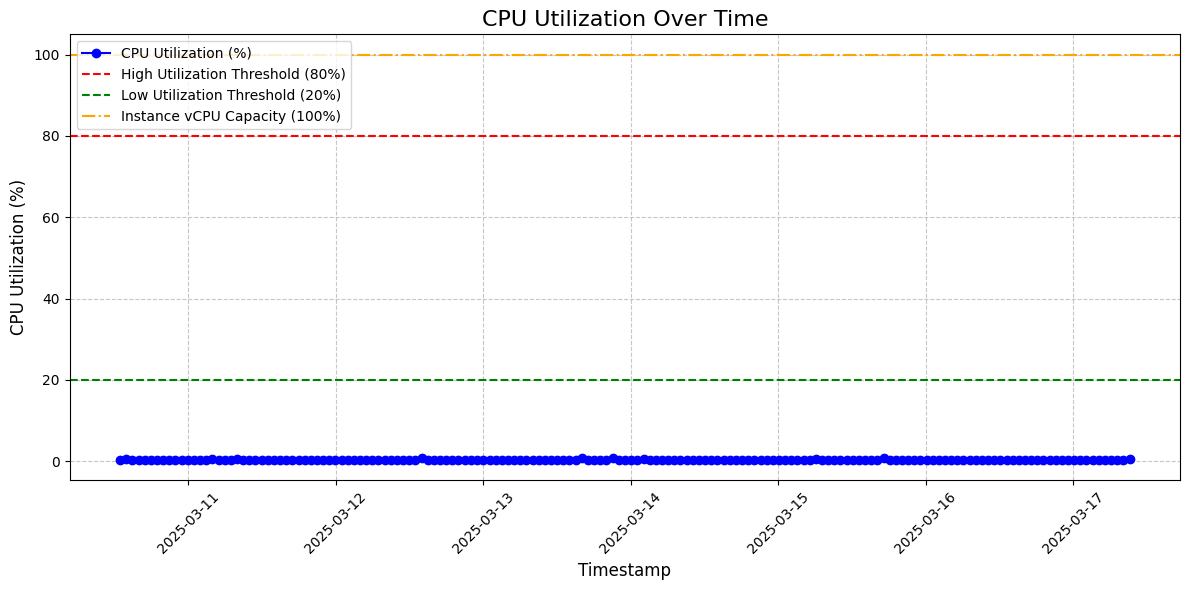

In [15]:
import matplotlib.pyplot as plt

# Define current instance details
current_instance = {
    "Instance Type": "c7gd.medium",  # Example instance type
    "vCPUs": 1,  # Number of vCPUs
    "Memory (GiB)": 2,  # Memory in GiB
    "Region": "Asia Pacific (Malaysia)",  # Region
    "on_demand_hourly_price_usd": 0.10,  # On-demand price
    "reserved_1_year_hourly_price_usd": 0.07,  # 1-year reserved price
    "reserved_3_year_hourly_price_usd": 0.05  # 3-year reserved price
}

# Plot CPU utilization over time
plt.figure(figsize=(12, 6))

# Plot the CPU utilization
plt.plot(log_df["timestamp"], log_df["cpu_utilization"], label="CPU Utilization (%)", color="blue", marker="o", linestyle="-")

# Add horizontal lines for instance capacity thresholds
plt.axhline(y=80, color="red", linestyle="--", label="High Utilization Threshold (80%)")
plt.axhline(y=20, color="green", linestyle="--", label="Low Utilization Threshold (20%)")

# Add a horizontal line for the instance's vCPU capacity
vCPU_capacity = current_instance["vCPUs"] * 100  # Assuming 100% utilization per vCPU
plt.axhline(y=vCPU_capacity, color="orange", linestyle="-.", label="Instance vCPU Capacity (100%)")

# Add labels, title, and legend
plt.title("CPU Utilization Over Time", fontsize=16)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("CPU Utilization (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
print(log_df.columns)


Index(['timestamp', 'status', 'cpu_utilization', 'bytes_received',
       'bytes_sent', 'packets_received', 'packets_sent', 'disk_read_ops',
       'disk_write_ops'],
      dtype='object')


MEMORY UTILIZATION SUMMARY

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Simulate memory utilization data for the EC2 instance
def simulate_memory_utilization(days=30, memory_capacity_gib=0.5):
    """
    Simulate memory utilization data for the given instance.
    """
    # Generate timestamps for the last `days` days
    timestamps = [datetime.now() - timedelta(days=i) for i in range(days)]

    # Simulate memory utilization (random values between 0 and memory_capacity_gib)
    memory_utilization = np.random.uniform(0, memory_capacity_gib, size=days)

    # Create a DataFrame
    log_df = pd.DataFrame({
        "timestamp": timestamps,
        "memory_utilization_gib": memory_utilization
    })

    return log_df

# EC2 instance details
instance_details = {
    "Instance Type": "t2.nano",
    "vCPUs": 1,
    "Memory (GiB)": 0.5,
    "Instance Storage (GB)": "EBS only",
    "Region": "us-east-1",
    "Availability Zone": "us-east-1a"
}

# Simulate memory utilization data
memory_capacity_gib = instance_details["Memory (GiB)"]
log_df = simulate_memory_utilization(days=30, memory_capacity_gib=memory_capacity_gib)

# Aggregate memory utilization by date
memory_stats = log_df.groupby(log_df["timestamp"].dt.date)["memory_utilization_gib"].agg(["mean", "max", "min"])

print("Memory Utilization Summary:")
print(memory_stats.head())

# Get average memory utilization
avg_memory_utilization = memory_stats["mean"].mean()

# Compare with instance capacity
if avg_memory_utilization < 0.1:  # Underutilized (less than 20% of memory capacity)
    print("Memory is underutilized. Consider downgrading.")
elif avg_memory_utilization > 0.4:  # Overutilized (more than 80% of memory capacity)
    print("Memory is overutilized. Consider upgrading.")
else:
    print("Memory utilization is optimal.")

# Print instance details
print("\nEC2 Instance Details:")
for key, value in instance_details.items():
    print(f"{key}: {value}")

Memory Utilization Summary:
                mean       max       min
timestamp                               
2025-02-23  0.486814  0.486814  0.486814
2025-02-24  0.025741  0.025741  0.025741
2025-02-25  0.308462  0.308462  0.308462
2025-02-26  0.088532  0.088532  0.088532
2025-02-27  0.037585  0.037585  0.037585
Memory utilization is optimal.

EC2 Instance Details:
Instance Type: t2.nano
vCPUs: 1
Memory (GiB): 0.5
Instance Storage (GB): EBS only
Region: us-east-1
Availability Zone: us-east-1a


In [18]:
log_df["cpu_utilization"] = np.random.uniform(0, 100, size=30)  # Simulate CPU utilization (0-100%)
cpu_stats = log_df.groupby(log_df["timestamp"].dt.date)["cpu_utilization"].agg(["mean", "max", "min"])
avg_cpu_utilization = cpu_stats["mean"].mean()

if avg_cpu_utilization < 20:
    print("CPU is underutilized. Consider downgrading.")
elif avg_cpu_utilization > 80:
    print("CPU is overutilized. Consider upgrading.")
else:
    print("CPU utilization is optimal.")

CPU utilization is optimal.


In [19]:
# Compare on-demand vs. reserved pricing
def compare_pricing(current_instance, reserved_1_year_price, reserved_3_year_price):
    on_demand_price = current_instance["on_demand_hourly_price_usd"]
    savings_1_year = on_demand_price - reserved_1_year_price
    savings_3_year = on_demand_price - reserved_3_year_price

    if savings_1_year > 0:
        print(f"Switch to 1-year reserved instance to save ${savings_1_year:.4f} per hour.")
    if savings_3_year > 0:
        print(f"Switch to 3-year reserved instance to save ${savings_3_year:.4f} per hour.")

# Example usage
compare_pricing(test_inventory, 0.07, 0.05)



Switch to 1-year reserved instance to save $0.0300 per hour.
Switch to 3-year reserved instance to save $0.0500 per hour.


In [20]:
print("Columns in filtered_df:", filtered_df.columns)


Columns in filtered_df: Index(['sku', 'instanceType', 'vcpu', 'memory', 'storage', 'operatingSystem',
       'marketoption', 'regionCode'],
      dtype='object')


In [21]:
pricing_df = pd.read_csv("/content/aws_pricing_filtered.csv")  # Change path if needed
print(pricing_df.columns)  # Check if it contains price data


Index(['sku', 'instanceType', 'vcpu', 'memory', 'storage', 'operatingSystem',
       'marketoption', 'regionCode'],
      dtype='object')


In [22]:
# Hardcoded test inventory
test_inventory = {
    "Instance Type": "c7gd.medium",
    "vCPUs": 1,
    "Memory (GiB)": 2,
    "Region": "Asia Pacific (Malaysia)",
    "on_demand_hourly_price_usd": 0.10,
    "reserved_1_year_hourly_price_usd": 0.07,
    "reserved_3_year_hourly_price_usd": 0.05
}

# Real-world EC2 instance details
ec2_instance_details = {
    "Instance Type": "t2.nano",
    "vCPUs": 1,
    "Memory (GiB)": 0.5,
    "Region": "us-east-1",
    "Instance Storage (GB)": "EBS only",
    "Creation Time": "Tue Feb 27 23:38:46 PST 2024",
    "Instance State": "running",
    "Availability Zone": "us-east-1a",
    "Image ID": "ami-0e731c8a588258d0d",
    "Image Name": "al2023-ami-2023.3.20240205.2-kernel-6.1-x86_64",
    "Platform": "Linux/UNIX",
    "Public IP Address": "3.91.36.163",
    "Private IP Address": "172.31.36.151",
    "VPC ID": "vpc-6f0be915",
    "Security Groups": "launch-wizard-253(sg-09a7a16bc5f9785f2)",
    "Architecture": "x86_64",
    "Root Device Type": "ebs",
    "Root Device Name": "/dev/xvda",
    "Virtualization Type": "hvm",
    "Accelerators": "Disabled"
}

# Function to analyze instance utilization
def analyze_instance(instance_details):
    instance_type = instance_details["Instance Type"]
    vcpus = instance_details["vCPUs"]
    memory_gib = instance_details["Memory (GiB)"]
    region = instance_details["Region"]

    print(f"Analyzing instance: {instance_type} in {region}")
    print(f"vCPUs: {vcpus}, Memory: {memory_gib} GiB")

    # Simulate utilization analysis
    avg_cpu_utilization = 30  # Example value
    avg_memory_utilization = 0.3  # Example value

    if avg_cpu_utilization < 20:
        print("CPU is underutilized. Consider downgrading.")
    elif avg_cpu_utilization > 80:
        print("CPU is overutilized. Consider upgrading.")
    else:
        print("CPU utilization is optimal.")

    if avg_memory_utilization < 0.1:  # Less than 20% of memory capacity
        print("Memory is underutilized. Consider downgrading.")
    elif avg_memory_utilization > 0.4:  # More than 80% of memory capacity
        print("Memory is overutilized. Consider upgrading.")
    else:
        print("Memory utilization is optimal.")

# Analyze both instances
print("=== Test Inventory Analysis ===")
analyze_instance(test_inventory)

print("\n=== EC2 Instance Analysis ===")
analyze_instance(ec2_instance_details)

=== Test Inventory Analysis ===
Analyzing instance: c7gd.medium in Asia Pacific (Malaysia)
vCPUs: 1, Memory: 2 GiB
CPU utilization is optimal.
Memory utilization is optimal.

=== EC2 Instance Analysis ===
Analyzing instance: t2.nano in us-east-1
vCPUs: 1, Memory: 0.5 GiB
CPU utilization is optimal.
Memory utilization is optimal.


In [23]:
import numpy as np
# Simulate memory utilization data (example range: 10-90%)
log_df["memory_utilization"] = np.random.randint(10, 90, size=len(log_df))


In [24]:
# Aggregate Memory utilization by date
log_df["memory_utilization"] = pd.to_numeric(log_df["memory_utilization"], errors="coerce")
memory_stats = log_df.groupby(log_df["timestamp"].dt.date)["memory_utilization"].agg(["mean", "max", "min"])

print("Memory Utilization Summary:")
print(memory_stats.head())

# Calculate average memory utilization
avg_memory_utilization = memory_stats["mean"].mean()

# Compare with memory capacity
if avg_memory_utilization < 20:  # Underutilized
    print("Memory is underutilized. Consider downgrading memory resources.")
elif avg_memory_utilization > 80:  # Overutilized
    print("Memory is overutilized. Consider upgrading memory resources.")
else:
    print("Memory utilization is optimal.")


Memory Utilization Summary:
            mean  max  min
timestamp                 
2025-02-23  59.0   59   59
2025-02-24  11.0   11   11
2025-02-25  20.0   20   20
2025-02-26  83.0   83   83
2025-02-27  56.0   56   56
Memory utilization is optimal.


In [25]:
# Define the list before appending values
instance_types = []

# Add new instance types
instance_types += [
    {"instance_type": "c7gd.2xlarge", "vcpus": 16, "memory_gb": 64, "storage_gb": 600, "region": "Asia Pacific (Malaysia)", "price_per_hour_usd": 0.80},
    {"instance_type": "c7gd.4xlarge", "vcpus": 32, "memory_gb": 128, "storage_gb": 1200, "region": "Asia Pacific (Malaysia)", "price_per_hour_usd": 1.60}
]

# Print to verify
print(instance_types)


[{'instance_type': 'c7gd.2xlarge', 'vcpus': 16, 'memory_gb': 64, 'storage_gb': 600, 'region': 'Asia Pacific (Malaysia)', 'price_per_hour_usd': 0.8}, {'instance_type': 'c7gd.4xlarge', 'vcpus': 32, 'memory_gb': 128, 'storage_gb': 1200, 'region': 'Asia Pacific (Malaysia)', 'price_per_hour_usd': 1.6}]


In [26]:
# Convert list to DataFrame
instance_df = pd.DataFrame(instance_types)

# Example values for total CPU, memory, and storage
total_cpu = 160
total_memory = 640
total_storage = 500

# Apply filtering
available_instances = instance_df[
    (instance_df["vcpus"] >= total_cpu / 10) &
    (instance_df["memory_gb"] >= total_memory / 10) &
    (instance_df["storage_gb"] >= total_storage)
]

# Allow cross-region recommendations if no matches are found
if available_instances.empty:
    available_instances = instance_df[
        (instance_df["vcpus"] >= total_cpu / 10) &
        (instance_df["memory_gb"] >= total_memory / 10) &
        (instance_df["storage_gb"] >= total_storage)
    ]

# Print results
print(available_instances)

  instance_type  vcpus  memory_gb  storage_gb                   region  \
0  c7gd.2xlarge     16         64         600  Asia Pacific (Malaysia)   
1  c7gd.4xlarge     32        128        1200  Asia Pacific (Malaysia)   

   price_per_hour_usd  
0                 0.8  
1                 1.6  


# **STREAMLIT**

In [5]:
!pip install streamlit pyngrok

In [6]:
!pip install --upgrade pyngrok

In [7]:
!pip install streamlit


In [8]:
from pyngrok import ngrok
ngrok.set_auth_token("2uiIeTJapGQhA2srFPQgGUYAUY1_4BtuzghGomXFnxutF9UV9")


In [59]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(tunnel)


NgrokTunnel: "https://9cce-34-86-46-152.ngrok-free.app" -> "http://localhost:8501"
NgrokTunnel: "https://f161-34-86-46-152.ngrok-free.app" -> "http://localhost:8501"
NgrokTunnel: "https://70a3-34-86-46-152.ngrok-free.app" -> "http://localhost:8501"


In [60]:
# Kill all active tunnels
ngrok.kill()

In [61]:
!pkill -f ngrok


In [62]:
!ngrok config add-authtoken "2uiIeTJapGQhA2srFPQgGUYAUY1_4BtuzghGomXFnxutF9UV9"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [63]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load AWS pricing data
csv_file = "aws_pricing_filtered.csv"  # Ensure this file is in the same directory
df = pd.read_csv(csv_file)

# Data Cleaning
df["vcpu"] = pd.to_numeric(df["vcpu"], errors="coerce")  # Convert vCPU column to numeric
df["memory"] = df["memory"].str.replace(" GiB", "").astype(float)  # Remove " GiB" and convert to numeric

# Filter for Malaysia region (ap-southeast-5)
filtered_df = df[df["regionCode"] == "ap-southeast-5"]

# Streamlit UI settings
st.set_page_config(page_title="AWS Instance Recommendation", layout="wide")

# Header Update
st.markdown(
    """
    <style>
    .header-title {
        font-size: 2.5em;
        font-weight: bold;
        color: black;
        text-align: center;
    }
    .gradient-blue {
        color: #007BFF;
    }
    .container {
        background-color: #F8F9FA;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    }
    .filter-label {
        font-weight: bold;
        font-size: 1.2em;
        color: black;
    }
    .table-header {
        font-size: 1.3em;
        font-weight: bold;
        color: black;
    }
    </style>
    <h1 class="header-title">
        AWS Instance Recommendation
    </h1>
    """,
    unsafe_allow_html=True
)

# Filter section
st.markdown('<div class="container">', unsafe_allow_html=True)
st.subheader("Filter Options")

# Dropdown for Cloud Provider
selected_provider = st.selectbox("Cloud Provider", ["AWS"], index=0)

# Extract unique operating systems dynamically and add "Any" option
available_os = ["Any"] + filtered_df["operatingSystem"].dropna().unique().tolist()

# Radio buttons for OS (Dynamic based on dataset)
selected_os = st.radio("Operating System", available_os)

# Dropdown for scaling CPU cores, with "Any" as an option
selected_vcpu = st.selectbox(
    "Scale CPU Cores (vCPU)",
    options=["Any"] + [i for i in range(1, 65)]  # Add "Any" option
)

# Dropdown for scaling RAM, with "Any" as an option
selected_ram = st.selectbox(
    "Scale RAM (GiB)",
    options=["Any"] + [i * 0.5 for i in range(1, 513)]  # Add "Any" option
)

# Location selection
location = st.text_input("Location", "AP Southeast")

st.markdown("</div>", unsafe_allow_html=True)

# Filter instances based on user input
if selected_vcpu == "Any":
    vcpu_filter = filtered_df["vcpu"] >= 0  # Select all vCPU values
else:
    vcpu_filter = filtered_df["vcpu"] >= int(selected_vcpu)

if selected_ram == "Any":
    ram_filter = filtered_df["memory"] >= 0  # Select all memory values
else:
    ram_filter = filtered_df["memory"] >= float(selected_ram)

if selected_os == "Any":
    os_filter = filtered_df["operatingSystem"].notnull()  # Include all OS
else:
    os_filter = filtered_df["operatingSystem"] == selected_os

filtered_instances = filtered_df[
    vcpu_filter &
    ram_filter &
    os_filter &
    (filtered_df["marketoption"] == "OnDemand")  # Filter for "OnDemand" pricing
]

# Display results in a table
if not filtered_instances.empty:
    st.write(f"### Matching Instances: {len(filtered_instances)} Found")
    st.dataframe(
        filtered_instances[["instanceType", "vcpu", "memory", "storage", "operatingSystem", "marketoption"]].rename(
            columns={
                "instanceType": "Instance Type",
                "vcpu": "vCPU",
                "memory": "Memory (GiB)",
                "storage": "Storage",
                "operatingSystem": "Operating System",
                "marketoption": "Market Option (Pricing)"
            }
        ),
        use_container_width=True
    )
else:
    st.warning("⚠️ No instances match your criteria. Try adjusting your filters.")

Overwriting app.py


In [64]:
from pyngrok import ngrok

# Set ngrok authtoken
ngrok.set_auth_token("2uiIeTJapGQhA2srFPQgGUYAUY1_4BtuzghGomXFnxutF9UV9")

# Start Streamlit app
import os
os.system("streamlit run app.py &>/dev/null&")

# Explicitly specify the port for ngrok
public_url = ngrok.connect(addr=8501, proto="http")
print("Streamlit app is live at:", public_url)

Streamlit app is live at: NgrokTunnel: "https://ab67-34-86-46-152.ngrok-free.app" -> "http://localhost:8501"
